# Семинар 8. Бустинги

### 1. Бэггинг и бустинг: идеи подходов

Основная идея **бэггинга** состоит в том, чтобы агрегировать ответы большого числа независимых переобученных моделей, имеющих низкое смещение и большую дисперсию. Агрегация позволяет добиться значительного снижения дисперсии при сохранении низкого смещения. Бэггинг над деревьями, в котором при построении каждого дерева при разбиениях используются случайные подмножества признаков, называется **случайным лесом**.

Идея бустинга заключается в последовательном построении алгоритмов, каждый из которых учитывает ошибки построенной до сих пор композиции.

$$
    \sum_{i = 1}^{\ell}
        L(y_i, a_{N - 1}(x_i) + \gamma_N b_N(x_i))
    \to
    \min_{b_N, \gamma_N}
$$


**Вопросики:**
- Что происходит на шаге $0$?
- Что происходит на шаге $N$?

$$ s_i
    =
    -
    \left.
    \frac{\partial L(y_i, z)}{\partial z}
    \right|_{z = a_{N - 1}(x_i)}
$$

$$
b_N(x)
    =
    argmin
        \sum_{i = 1}^{l}
            \left(
                b(x_i) - s_i
            \right)^2
$$

#### 1.1 Простой пример.

Пусть мы решаем задачу регрессии на тренировочной выборке $(X, y)$. Мы обучаем модель $a(X)$, которая является композицией базовых моделей $b_n(X)$. Будем считать, что композиция строится простым суммированием ответов базовых моделей:

$$
a(X) = \sum_{n = 1}^{k} b_n(X).
$$

В качестве базовой модели будем использовать решающее дерево глубины один (decision stump).

Будем решать задачу при помощи минимизации среднеквадратичной ошибки:

$$
\dfrac{1}{\ell}\sum_{i = 1}^{\ell} (a(x_i) - y_i)^2 \to \min_a.
$$

В этом примере будем работать только с обучающей выборкой.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

In [ ]:
np.random.seed(123)
N = 100
X = np.linspace(0, 1*np.pi, N).reshape(-1, 1)
y = np.sin(X)[:, 0] + np.random.normal(0, 0.1, size = N)

# Функция для визуализации выборки и предсказаний
def plot_sample_model(X, y, plot_predictions=False, y_pred=None, y_pred_label=None, loss='mse'):
    plt.figure(figsize = (10, 7))
    plt.scatter(X, y, label = 'Обучающая выборка', alpha = 0.7)
    if plot_predictions:
        plt.plot(X, y_pred, label = y_pred_label, c = 'r')
        if loss == 'mse':
            plt.title('MSE: ' + str(mean_squared_error(y, y_pred)))
        elif loss == 'mae':
            plt.title('MAE: ' + str(mean_absolute_error(y, y_pred)))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend();

plot_sample_model(X, y, plot_predictions = False)

**Шаг 0.** Имеем пустую композицию решающих деревьев $a(X) = \{\}$.

In [ ]:
a = 0

**Шаг 1.** Обучим первое решающее дерево $DT_1$ и включим его в композицию: $a^{(1)}(X) = DT_1$. Получим предсказания композиции на обучающей выборке.

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# TODO: обучите решающее дерево глубины 1 и сделайте предсказания на обучающей выборке
...

# TODO: включите предсказания первого дерева в композицию (простым суммированием)
a = ...

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a, y_pred_label = 'Предсказания a = DT1')

**Шаг 2.** В качестве ошибок композиции будем использовать **сдвиги**, в случае MSE — это то же самое, что и остатки или ошибки


**Задание:** вычислите градиент $MSE$

$$
L(y, p) = \dfrac{1}{2} \sum_{i = 1}^{\ell} (y_i - p_i)^2
$$

по $p_i$ в точке $p_i = a(x_i)$.

**Решение:**

$$
\dfrac{\partial L(y, p)}{\partial p_i} = -(y_i - p_i) = \{p_i = a(x_i)\} = -(y_i - a(x_i)).
$$

Таким образом, антиградиент функции потерь равен:

$$
s_i = - (-(y_i - a(x_i))) = y_i - a(x_i),
$$

In [ ]:
# TODO: рассчитайте сдвиги
s1 = ...

**Шаг 3.** Обучим второе решающее дерево $DT_2$, предсказывающее сдвиги. Добавим предсказания второго дерева в композицию: $a^{(2)}(X) = DT_1 + DT_2$. Получим предсказания композиции на обучающей выборке.

In [ ]:
# TODO: обучите второе решающее дерево глубины 1, предсказывающее остатки
...

# TODO: сделайте предсказания на обучающей выборке
...

# TODO: включите предсказания второго дерева в композицию (простым суммированием)
a += ...

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a, y_pred_label = 'Предсказания a = DT1 + DT2')

Как мы видим, решающая поверхность стала более сложной, и теперь она более точно приближает обучающую выборку.

**Шаги 4 – ...** Повторяем шаги 2-3, пока не надоест.

In [ ]:
# TODO: рассчитайте остатки
s2 = ...

# TODO: обучите третье решающее дерево глубины 1, предсказывающее остатки
...

# TODO: сделайте предсказания на обучающей выборке
...

# TODO: включите предсказания третьего дерева в композицию (простым суммированием)
a += ...

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a, y_pred_label = 'Предсказания DT1 + DT2 + DT3')

Как мы видим, при добавлении базовых моделей решающая поверхность становится более сложной и всё точнее приближает обучающую выборку.

**Важный момент:** заметим, что при обучении очередной базовой модели композиция предыдущего шага считается фиксированной. Это означает, что обучение новой базовой модели не влияет на уже обученные модели, содержащиеся в композиции.

### 2. Функции потерь градиентного бустинга для регрессии и классификации

#### 2.1 Регрессия.

В задачах регрессии в качестве целевой функции для композиции обычно берутся:

1. $MSE$, которую мы рассматривали ранее.

2. $MAE$:

$$
MAE(y, p) = \sum_{i = 1}^{\ell} |y_i - p_i|
$$

Попробуем сделать шаг градиентного бустинга, используя в качестве функции потерь $MAE$.

**Задание:** рассчитайте $s_i$ для $MAE$.

**Решение:** $s_i^{(N)} = -\mathrm{sign}(a^{(N-1)}(x_i) - y_i)$.

In [ ]:
# Инициализация
a = 0

# Обучение решающего дерева глубины 1 и получение предсказаний на обучающей выборке
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(X, y)
dt1_pred = dt1.predict(X)

# Включение предсказаний первого дерева в композицию (простым суммированием)
a = dt1_pred

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a, y_pred_label = 'Предсказания a = DT1', loss = 'mae')

In [ ]:
# TODO: рассчитайте антиградиент
s1 = ...

In [ ]:
# Обучение второго решающего дерева глубины 1, предсказывающего антиградиент
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(X, s1)

# Получение предсказаний на обучающей выборке
dt2_pred = dt2.predict(X)

# Включение предсказаний второго дерева в композицию (простым суммированием)
a += dt2_pred

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a,
                  y_pred_label = 'Предсказания a = DT1 + DT2', loss = 'mae')

Заметим, что $MAE$ увеличилась, а решающая поверхность имеет "виток", уходящий за пределы обучающей выборки. Эту проблему мы решим позже.

#### 2.2 Классификация.

В задачах бинарной классификации обычно используется логистическая функция потерь, с которой мы уже сталкивались в логистической регрессии.

$$
L(y, p) = \log(1 + e^{-yp}).
$$

Плиз, умейте показывать, что в этом случае антиградиенты можно вычислить по формуле

$$
s^{(N)}_i = \dfrac{y_i}{1 + e^{y_ia^{(N-1)}(x_i)}}
$$

Попробуем сделать шаг градиентного бустинга в задаче бинарной классификации с логистической функцией потерь.

In [ ]:
from sklearn.datasets import make_moons, load_iris # import function from the library

N = 1000

X, y = make_moons(n_samples=N, noise=0.1, random_state=11) # generate data sample
y = y * 2 - 1 # {-1, +1}

In [ ]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[y == -1, 0],     # selects all objects with y == 0 and the 1st column of X
            X[y == -1, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='C3',        # points color
            label='-1')        # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='C0',        # points color
            label='1')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid() # create grid on the plot

plt.show() # display the plot


In [ ]:
# Инициализация
a = 0

# Обучение решающего дерева глубины 1 и получение предсказаний на обучающей выборке
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(X, y)
dt1_pred = dt1.predict(X)

# Включение предсказаний первого дерева в композицию (простым суммированием)
a = dt1_pred

In [ ]:
def log_loss(y, y_pred):
    return np.log(1 + np.exp(- y * y_pred)).mean()

In [ ]:
from sklearn.metrics import roc_auc_score

# Вычисление ошибки для одного дерева
ll = log_loss(y, a)
print("LogLoss = %f" % (ll))

# Вычисление ROC AUC
auc = roc_auc_score(y, a)
print("ROC AUC = %f" % (auc))

In [ ]:
# TODO: рассчитайте антиградиент
s1 = ...

In [ ]:
# Обучение второго решающего дерева глубины 1, предсказывающего антиградиент
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(X, s1)

# Получение предсказаний на обучающей выборке
dt2_pred = dt2.predict(X)

# Включение предсказаний второго дерева в композицию (простым суммированием)
a += dt2_pred

In [ ]:
# Вычисление ошибки для одного дерева
ll = log_loss(y, a)
print("LogLoss = %f" % (ll))

# Вычисление ROC AUC
auc = roc_auc_score(y, a)
print("ROC AUC = %f" % (auc))

### 3. Особенности градиентного бустинга

#### 3.1 Построение композиции.

В примерах выше мы строили композицию моделей простым суммированием. Понятно, что в общем виде можно строить взвешенную сумму базовых моделей:

$$
a(X) = \sum_{n = 1}^{k} w_nb_n(X),
$$

где коэффициенты $w_n$ можно подобрать, например, при помощи градиентного спуска в задаче

$$
w_n = \arg\min_{w} \sum_{i = 1}^{\ell} L(y_i, a^{(N-1)}(x_i) + w \times b_N(x_i)),
$$

что имеет смысл, так как $b_N(x_i)$ уже обучена и фиксирована.

**Замечание:** длина шага является одним из ключевых параметров градиентного бустинга, и может очень сильно повлиять на результат.

В нашем случае подбор правильного коэффициента поможет решить увеличение MAE в примере 3.1.

In [ ]:
# Инициализация
np.random.seed(123)
N = 100
X = np.linspace(0, 1*np.pi, N).reshape(-1, 1)
y = np.sin(X)[:, 0] + np.random.normal(0, 0.1, size = N)
a = 0

# Обучение решающего дерева глубины 1 и получение предсказаний на обучающей выборке
dt1 = DecisionTreeRegressor(max_depth = 1)
dt1.fit(X, y)
dt1_pred = dt1.predict(X)

# Включение предсказаний первого дерева в композицию (простым суммированием)
a = dt1_pred

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a, y_pred_label = 'Предсказания a = DT1', loss = 'mae')

In [ ]:
# Вычисление антиградиента
s1 = -np.sign(a - y)

In [ ]:
# TODO: подберите (угадайте) вес так, чтобы уменьшить MAE
w = ...

In [ ]:
# Обучение второго решающего дерева глубины 1, предсказывающего антиградиент
dt2 = DecisionTreeRegressor(max_depth = 1)
dt2.fit(X, s1)

# Получение предсказаний на обучающей выборке
dt2_pred = dt2.predict(X)

# Включение предсказаний второго дерева в композицию (простым суммированием)
a += w * dt2_pred

# Визуализация выборки и предсказаний
plot_sample_model(X, y, plot_predictions = True, y_pred = a,
                  y_pred_label = 'Предсказания a = DT1 + DT2', loss = 'mae')

#### 3.2 Переобучение.

Вспомним, что в случае бэггинга увеличение числа базовых моделей не приводит к переобучению. Мы могли бы наблюдать, что вслучайном лесе ошибки на тренировочной и тестовой выборках выходили на плато, начиная с какого-то числа деревьев. Понятно, что бустинг не будет обладать этим свойством *по построению*: при добавлении новых базовых моделей композиция всё точнее будет приближать обучающую выборку, что в конечном итоге (зачастую быстро) может привести к переобучению. Из этого можно сделать вывод, что в случае бустинга ошибка на обучающей выборке в зависимости от числа деревьев является убывающей функцией, а ошибка на тестовой выборке, скорее всего, имеет U-образный вид. Убедимся в этом и сравним поведение ошибок и решающих поверхностей бустинга и случайного леса.

Здесь и далее будем использовать [реализацию бустинга](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из `sklearn`, которая представляет собой градиентный бустинг над деревьями.

В качестве способа регуляризации также может использоваться сокращение шага:

$$
a^{(N)}(X) = a^{(N-1)}(X) + \alpha w_N b^{(N)}(X),
$$

где $\alpha \in (0, 1]$ – темп обучения,

или стохастический градиентный бустинг.

В случае бустинга (при средней `learning_rate`, к примеру равной 1) ошибка на тренировочной выборке стабильно убывает, а на тестовой – возрастает, что вероятно говорит об (очень быстром) переобучении. Если же мы аккуратно подберём гиперпараметры для деревьев и длину шага, то сможем добиться типичной U-образной формы функции потерь на тестовой выборке.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
# Генерация выборки
np.random.seed(123)
X = np.linspace(0, 1, 300).reshape(-1, 1)

def target(a):
    return a > 0.5

y = target(X) + np.random.normal(size = X.shape) * 0.1
y = y[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Визуализация выборки
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, label = 'Обучающая выборка')
plt.scatter(X_test, y_test, label = 'Тестовая выборка')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Функция, которая обучает случайный лес и градиентный бустинг при разной `learning_rate`.

`learning_rate` - важный гиперпараметр (так же, как и в градиентном спуске). При маленьком значении - потребуется много деревьев, при большом - можно разойтись.

In [ ]:
def compare_fr_and_gb(learning_rate_gb):
  # Визуализация решающих поверхностей
  trees = [1, 2, 5, 20, 100, 500, 1000]



  fig, ax = plt.subplots(len(trees)+1, 2, figsize = (30, 50))

  loss_rf_train = []
  loss_gb_train = []
  loss_rf_test = []
  loss_gb_test = []

  for i, ts in enumerate(trees):
      rf = RandomForestRegressor(n_estimators = ts, max_depth = 1)
      gb = GradientBoostingRegressor(n_estimators = ts, max_depth = 1, learning_rate = learning_rate_gb)

      rf.fit(X_train, y_train)
      ax[i, 0].scatter(X_train, y_train, label = 'Обучающая выборка')
      ax[i, 0].scatter(X_test, y_test, label = 'Тестовая выборка')
      ax[i, 0].plot(sorted(X_test), rf.predict(sorted(X_test)), lw = 3, c = 'red', label = 'Предсказания на тестовой выборке')
      ax[i, 0].set_xlabel('X')
      ax[i, 0].set_ylabel('Y')
      ax[i, 0].set_title('Случайный лес, число деревьев = ' + str(ts) + ', MSE = ' + str(mean_squared_error(y_test, rf.predict(X_test))))
      ax[i, 0].legend();

      loss_rf_train.append(mean_squared_error(y_train, rf.predict(X_train)))
      loss_rf_test.append(mean_squared_error(y_test, rf.predict(X_test)))

      gb.fit(X_train, y_train)
      ax[i, 1].scatter(X_train, y_train, label = 'Обучающая выборка')
      ax[i, 1].scatter(X_test, y_test, label = 'Тестовая выборка')
      ax[i, 1].plot(sorted(X_test), gb.predict(sorted(X_test)), lw = 3, c = 'red', label = 'Предсказания на тестовой выборке')
      ax[i, 1].set_xlabel('X')
      ax[i, 1].set_ylabel('Y')
      ax[i, 1].set_title('Градиентный бустинг, число деревьев = ' + str(ts) + ', MSE = ' + str(mean_squared_error(y_test, gb.predict(X_test))))
      ax[i, 1].legend();

      loss_gb_train.append(mean_squared_error(y_train, gb.predict(X_train)))
      loss_gb_test.append(mean_squared_error(y_test, gb.predict(X_test)))

  # Визуализация ошибок
  ax[-1, 0].plot(trees, loss_rf_train, label = 'MSE_Train')
  ax[-1, 0].plot(trees, loss_rf_test, label = 'MSE_Test')
  ax[-1, 0].set_xlabel('Число деревьев')
  ax[-1, 0].set_ylabel('MSE')
  ax[-1, 0].set_title('Случайный лес')
  ax[-1, 0].legend()

  ax[-1, 1].plot(trees, loss_gb_train, label = 'MSE_Train')
  ax[-1, 1].plot(trees, loss_gb_test, label = 'MSE_Test')
  ax[-1, 1].set_xlabel('Число деревьев')
  ax[-1, 1].set_ylabel('MSE')
  ax[-1, 1].set_title('Градиентный бустинг')
  ax[-1, 1].legend();

In [ ]:
#Подходящяя learning_rate
compare_fr_and_gb(1)

Как мы видим, решающая поверхность случайного леса не изменяется (уже со второго дерева), в то время как для бустинга она становится всё более сложной.

In [ ]:
#Маленькая learning_rate
compare_fr_and_gb(0.1)

При маленькой длине шага требуется несколько деревьев, чтобы предсказывать хорошо: В `sklearn` нулевая модель - константа (среднее) = $0.5$, первая модель-дерево предсказала $+/-0.5$, с учетом `learning_rate` получилось $+/-0.05$, ... Поэтому требовалось много деревьев.

In [ ]:
#Огромная learning_rate - код выдаст ошибку
compare_fr_and_gb(100)

При огромной длине шага все плохо. Нулевая модель - константа (среднее) = $0.5$, первая модель-дерево предсказала $+/-0.5$, с учетом `learning_rate` получилось $+/-50$ - предсказания очень далеки от истины, следующее дерево пытается предсказать $-/+50$, с учетом `learning_rate` вышло $-/+5000$ - стало много хуже :) С каждым новым деревом качество все ухудшается, пока не станет бесконечно плохим ($MSE= +\infty$)

**Важный момент:** примеры выше демонстрируют, насколько быстро бустинг может переобучаться, и как в его случае важен подбор гиперпараметров. В связи с этим может сложиться ситуация, что градиентный бустинг с дефолтными параметрами показывает более плохое качество, чем, например, случайный лес с дефолтными параметрами, однако хорошо настроенный градиентный бустинг [обычно превосходит](https://www.quora.com/How-can-the-performance-of-a-Gradient-Boosting-Machine-be-worse-than-Random-Forests) случайный лес по качеству. Важна и конкретная реализация бустинга: например, [здесь](https://medium.com/data-science/boosting-showdown-scikit-learn-vs-xgboost-vs-lightgbm-vs-catboost-in-sentiment-classification-f7c7f46fd956) представлено очень хорошее сравнение различных имплементаций.

#### 3.3 Пара слов о смещении и дисперсии.

Вспомним, что в случайном лесе в качестве базовых моделей мы брали переобученные деревья, мотивируя это тем, что бэггинг позволит сохранить низкое смещение и при этом уменьшить дисперсию. Бустинг по построению работает проивоположно: композиция обладает более низким, чем базовые модели, смещением, но такой же или большей дисперсией (ещё раз проговорите последовательность построения бустинга, и вы увидите, почему это так). Поэтому в качестве базовых моделей для бустинга обычно используются модели с высоким смещением и низкой дисперсией – как мы знаем, такие модели являются недообученными – например, неглубокие решающие деревья.

### 4. Catboost vs. XGBoost vs. LightGBM

[Source](https://github.com/Murcha1990/ML_econom_2022-2023/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%2010*/Seminar10_%D0%B1%D0%BE%D0%BD%D1%83%D1%81.ipynb)

Ранее мы смотрели простую версию градиентного бустинга из scikit-learn, [придуманную в 1999 году Фридманом](https://projecteuclid.org/download/pdf_1/euclid.aos/1013203451). Прогресс не стоит на месте, и на сегодняшний день есть три популярные библиотеки с разными имплементациями градиентного бустинга, которые на практике показывают лушие результаты:
*  **XGBoost**. Появилась в 2014 году, [статья автора](https://arxiv.org/pdf/1603.02754.pdf) вышла в 2016. После выхода быстро набрала популярность и оставалась стандартом до конца 2016 года.
* **CatBoost** от компании Яндекс с релизом в 2017 году. Алгоритм можно запускать с дефолтными гиперпараметрами, потому тчо он является менее чувствительным к выбору их конкретных значений. Отлично умеет работать с категориальным признаками, при этом автоматически обрабатывая полученные на вход непредобработанные фичи.
* **LightGBM**. Релиз в один год с Catboost, библиотека от Microsoft. Отличается очень быстрым построением композиции. Например, при построении узла дерева, вместо перебора по всем значениям признака, производится перебор значений гистограммы этого признака. Таким образом, вместо $O(N)$ требуется $O$(m), где $m$ - число бинов гистограммы. В отличие от других библиотек, строит деревья в глубину, при этом на каждом шаге строит вершину, дающую наибольшее уменьшение функционала.

**Техническое отступление**

Данные библиотеки необходимо сначала устанавливать (можно через pip / conda или brew, если Вы работаете на MAC OS).
Чтобы у Вас точно вопроизводился ноутбук и не было проблем из-за несовпадающих версий библиотек, рекомендуется через python создавать виртуальную среду.

In [ ]:
!pip install catboost lightgbm cmake xgboost # без cmake xgboost установится, но не будет импортироваться
!pip install catboost

In [ ]:
import catboost
import lightgbm
import xgboost

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
%matplotlib inline

plt.rcParams["figure.figsize"] = (8, 5)

#### 4.1 Catboost

Особенности Catboost:

1. Симметричные деревья решений

2. Для кодирования категориальных признаков используется большой набор методов

3. Динамический бустинг (данные, на которых были допущены ошибки, получают больший вес)

Симметричное (symmetric) дерево решений:

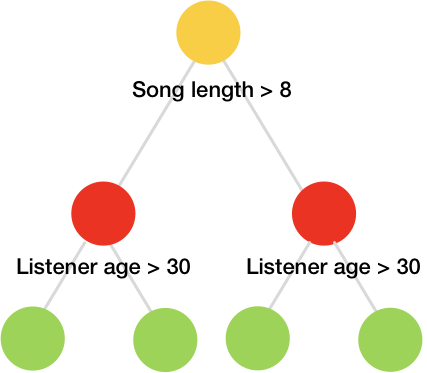

В алгоритме сделаны улучшения и выбор разных опций для борьбы с переобучением, подсчету среднего таргета на отложенной выборке, подсчету статистик по категориальным фичам, бинаризацией фичей, рандомизации скора сплита, разные типы бутсрапирования.

Давайте сначала зафиксируем все гиперпараметры со значениями по умолчанию, кроме количества деревьев в композиции - `n_estimators`.

In [ ]:
def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='plasma'
                   )

    # Добавим на график сами наблюдения
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma'
                )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)

In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(n_estimators=300,
                              logging_level='Silent'
                              # можно подать список тех признаков, с которыми надо работать, как с категориальным
                              #cat_features = ...
                              )
catboost.fit(X_train, y_train)
plot_surface(X_test, y_test, catboost)

print(roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1]))

#### 4.2 XGBoost

Особенности XGBoost:


1. Базовый алгоритм приближает направление, посчитанное с учетом второй производной функции потерь

2. Функционал регуляризуется – добавляются штрафы за количество листьев и за норму коэффициентов

3. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига

4. Критерий останова при обучении дерева также зависит от оптимального сдвига

Ссылка на [источник](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/lecture-notes/lecture11-ensembles.pdf)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, verbosity=0)
xgb.fit(X_train, y_train)
plot_surface(X_test, y_test, xgb)

print(roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

#### 4.3 LightGBM

Особенности LightGBM:

1.   Полиственное (leaf-wise), а не поуровневое (depth-wise) построение деревьев; Про отличие написано [здесь](https://datascience.stackexchange.com/questions/26699/decision-trees-leaf-wise-best-first-and-level-wise-tree-traverse)
2. Бинаризация числовых признаков (объединение значений признака в группы, как при создании гистограммы)
3. Работа с изначальными категориальными признаками: оптимальный сплит для категориального признака ищется разделением множества категорий на 2 группы (существует эффективный способ поиска оптимального разбиения)

Итого: быстрее и требует меньше памяти

Почитать подробнее можно тут: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [ ]:
from lightgbm import LGBMClassifier

lightgbm = LGBMClassifier(n_estimators=3, num_leaves=6, verbose=-1)
lightgbm.fit(X_train, y_train)
plot_surface(X_test, y_test, lightgbm)

print(roc_auc_score(y_test, lightgbm.predict_proba(X_test)[:, 1]))

Когда мы обучили лучшие версии моделей, можно их сохранить и использовать для получения предсказаний, например, на новом батче данных.

In [ ]:
'''
# Сохранить
lightgbm.booster_.save_model('lightgbm.txt')
catboost.save_model('catboost.cbm', format='cbm')
xgboost.save_model('xgboost.json')

# Загрузить
lightgbm = LGBMClassifier(model_file='mode.txt')
catboost = catboost.load_model('catboost.cbm')
xgboost = xgboost.load_model('xgboost.json')
''';